In [1]:
from datetime import datetime
from pydriller import Repository
from operator import itemgetter

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

# mining select repository with sub folder after the start date
# return folder name which number of commit change, and line of code change
def mining(start_date, repository, sub_folder):
    submodule_commit, submodule_diff = dict(), dict()
    for commit in Repository(repository, filepath=sub_folder, since=start_date).traverse_commits():
        for m in commit.modified_files: # see the change in each file
            ## check new_path first if it not exist check old_path (meaning the file is removed)
            split = None
            if m.new_path == None:
                split = m.old_path.split('/')            
            else:
                split = m.new_path.split('/')
            if split[0] == 'nova':
                submodule = split[1] # split[0] show nova folder, while split[1] show subfolder
                if '.py' in submodule: # if split[1] contains python file (not a folder) skip
                    continue
                if submodule not in submodule_commit:
                    submodule_commit[submodule] = 0
                    submodule_diff[submodule]   = 0
                submodule_commit[submodule] += 1 # count number of commit
                submodule_diff[submodule]   += m.added_lines + m.deleted_lines # count number of line
    
    return submodule_commit, submodule_diff

# sort from maximum to minimum then select top 12                
def top12(input_dict):
    return sorted(input_dict.items(), key=itemgetter(1), reverse=True)[0:12]

def plot(data_list,x_label,title,file_name):
    objects = [i[0] for i in data_list]
    y_pos =[i for i in reversed(range(len(data_list)))]
    performance = [i[1] for i in data_list]

    plt.barh(y_pos, performance, align='center')
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(title)
    plt.savefig(file_name)

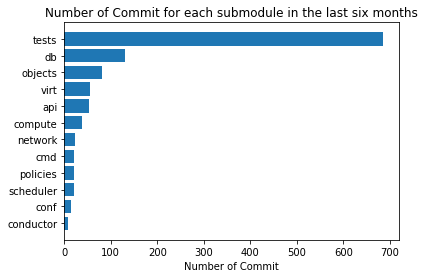

In [2]:
# start mining from the last six month while if the commit must contains /nova subfolder
# current month is November then I will start mining from May
submodule_commit, submodule_diff = mining(datetime(2021, 5 , 1), 'nova', 'nova/')

sorted_submodule_commit = top12(submodule_commit)
sorted_submodule_diff   = top12(submodule_diff)

# plot the graph for number of commit for each module
plot(sorted_submodule_commit,'Number of Commit','Number of Commit for each submodule in the last six months','commit.png')

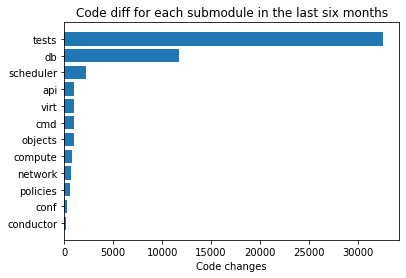

In [3]:
# plot the graph for code change for each module
plot(sorted_submodule_diff,'Code changes','Code diff for each submodule in the last six months','churn.png')